In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import convert as converter

# Latex points to inches conversion factor
PTS_PER_INCH = 72.26999
# Latex text width in points
TEXT_WIDTH_PTS = 505.12177
# Latex column width in points
COLUMN_WIDTH_PTS = TEXT_WIDTH_PTS / 2
# Latex column width in inches
COLUMN_WIDTH_INCHES = COLUMN_WIDTH_PTS / PTS_PER_INCH
# Latex text width in inches
TEXT_WIDTH_INCHES = TEXT_WIDTH_PTS / PTS_PER_INCH
# DPI for figures
DPI = 600
# Font scale for figures
FONT_SCALE = 0.5

plt.rcParams['font.stretch'] = 'condensed'
plt.rcParams['font.family'] = 'sans-serif'
matplotlib.rc('xtick', labelsize=5) 
matplotlib.rc('ytick', labelsize=5) 

def plot_signal(ds: xr.Dataset, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(ds['time'], ds['data'])
    ax.set_ylabel(f"{ds.attrs['units']}")
    ax.set_title(f'{ds.label}\n{ds.attrs["name"]}', fontsize=5)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
data_path = Path('~/data/tiny').expanduser()
# shot_files = list(data_path.glob('*.zarr'))
shot_file = data_path / '30390.zarr'

defuse_signals = [
    'ama/n=odd_amplitude',
    'ama/n=2_frequency',
    'amc/plasma_current',
    'asm/out_nn_rating',
    'esm/surface_area',
    'efm/bvac_rmag',
    'efm/triang_lower',
    'efm/triang_upper',
    'efm/plasma_currx',
    'efm/elongation',
    'efm/li',
    'efm/q_95',
    'efm/magnetic_axis_r',
    'efm/geom_axis_rc',
    'efm/plasma_volume',
    'efm/plasma_energy',
    'efm/current_centrd_z',
    'efm/magnetic_axis_z',
    'efm/minor_radius',
    'efm/lcfsr_c',
    'efm/lcfsz_c',
    'esm/v_loop_dynamic',
    'esm/v_loop_static',
    'xdc/ip_t_ipref',
    'xsx/hcam_l_1',
    'xsx/hcam_l_10',
    'xsx/hcam_l_11',
    'xsx/hcam_l_12',
    'xsx/hcam_l_13',
    'xsx/hcam_l_14',
    'xsx/hcam_l_15',
    'xsx/hcam_l_16',
    'xsx/hcam_l_17',
    'xsx/hcam_l_18',
    'xsx/hcam_l_2',
    'xsx/hcam_l_3',
    'xsx/hcam_l_4',
    'xsx/hcam_l_5',
    'xsx/hcam_l_6',
    'xsx/hcam_l_7',
    'xsx/hcam_l_8',
    'xsx/hcam_l_9',
    'xsx/hcam_u_1',
    'xsx/hcam_u_10',
    'xsx/hcam_u_11',
    'xsx/hcam_u_12',
    'xsx/hcam_u_13',
    'xsx/hcam_u_14',
    'xsx/hcam_u_15',
    'xsx/hcam_u_16',
    'xsx/hcam_u_17',
    'xsx/hcam_u_18',
    'xsx/hcam_u_2',
    'xsx/hcam_u_3',
    'xsx/hcam_u_4',
    'xsx/hcam_u_5',
    'xsx/hcam_u_6',
    'xsx/hcam_u_7',
    'xsx/hcam_u_8',
    'xsx/hcam_u_9',
    'xsx/tcam_1',
    'xsx/tcam_10',
    'xsx/tcam_11',
    'xsx/tcam_12',
    'xsx/tcam_13',
    'xsx/tcam_14',
    'xsx/tcam_15',
    'xsx/tcam_16',
    'xsx/tcam_17',
    'xsx/tcam_18',
    'xsx/tcam_2',
    'xsx/tcam_3',
    'xsx/tcam_4',
    'xsx/tcam_5',
    'xsx/tcam_6',
    'xsx/tcam_7',
    'xsx/tcam_8',
    'xsx/tcam_9',
]

datasets = converter.load_signals(shot_file, defuse_signals)
datasets = {name: converter.standardise_names(ds) for name, ds in datasets.items()}


/XDC/IP/T/IPREF


In [15]:

datasets['amc/plasma_current']['data']
datasets['amc/plasma_current'].attrs['units']

'kA'

In [16]:

datasets['xdc/ip_t_ipref']['data']
datasets['xdc/ip_t_ipref'].attrs['units']

'MA'

In [17]:
# Rescale plasma current
datasets['amc/plasma_current']['data'] * 1000
datasets['amc/plasma_current'].attrs['units'] = 'A'
# Rescale ipref 
datasets['xdc/ip_t_ipref']['data'] * 1000 * 1000
datasets['xdc/ip_t_ipref'].attrs['units'] = 'A'

In [18]:
tcam_channels = [
    'xsx/tcam_1',
    'xsx/tcam_2',
    'xsx/tcam_3',
    'xsx/tcam_4',
    'xsx/tcam_5',
    'xsx/tcam_6',
    'xsx/tcam_7',
    'xsx/tcam_8',
    'xsx/tcam_9',
    'xsx/tcam_10',
    'xsx/tcam_11',
    'xsx/tcam_12',
    'xsx/tcam_13',
    'xsx/tcam_14',
    'xsx/tcam_15',
    'xsx/tcam_16',
    'xsx/tcam_17',
    'xsx/tcam_18',
]

hcam_l_channels = [
    'xsx/hcam_l_1',
    'xsx/hcam_l_2',
    'xsx/hcam_l_3',
    'xsx/hcam_l_4',
    'xsx/hcam_l_5',
    'xsx/hcam_l_6',
    'xsx/hcam_l_7',
    'xsx/hcam_l_8',
    'xsx/hcam_l_9',
    'xsx/hcam_l_10',
    'xsx/hcam_l_11',
    'xsx/hcam_l_12',
    'xsx/hcam_l_13',
    'xsx/hcam_l_14',
    'xsx/hcam_l_15',
    'xsx/hcam_l_16',
    'xsx/hcam_l_17',
    'xsx/hcam_l_18',
]

hcam_u_channels = [
    'xsx/hcam_u_1',
    'xsx/hcam_u_2',
    'xsx/hcam_u_3',
    'xsx/hcam_u_4',
    'xsx/hcam_u_5',
    'xsx/hcam_u_6',
    'xsx/hcam_u_7',
    'xsx/hcam_u_8',
    'xsx/hcam_u_9',
    'xsx/hcam_u_10',
    'xsx/hcam_u_11',
    'xsx/hcam_u_12',
    'xsx/hcam_u_13',
    'xsx/hcam_u_14',
    'xsx/hcam_u_15',
    'xsx/hcam_u_16',
    'xsx/hcam_u_17',
    'xsx/hcam_u_18',
]


datasets['xsx/tcam'] = converter.combine_channels(datasets, tcam_channels)
datasets['xsx/hcam_l'] = converter.combine_channels(datasets, hcam_l_channels)
datasets['xsx/hcam_u'] = converter.combine_channels(datasets, hcam_u_channels)

converter.remove_channels(datasets, tcam_channels)
converter.remove_channels(datasets, hcam_l_channels)
converter.remove_channels(datasets, hcam_u_channels)

In [19]:
converter.add_camera_parameters(datasets, 'xsx/tcam', 'xsx_camera_l.csv')
converter.add_camera_parameters(datasets, 'xsx/hcam_l', 'xsx_camera_u.csv')
converter.add_camera_parameters(datasets, 'xsx/hcam_u', 'xsx_camera_t.csv')

In [9]:
# converter.convert_lcfs(datasets)
# datasets['efm/lcfs'] = datasets['efm/lcfs'].chunk()

In [20]:
file_name = Path('30420.zarr')
converter.write_zarr(datasets, file_name)
converter.convert_to_hdf(file_name)

In [21]:
xr.open_dataset('30420.zarr/xsx/hcam_l', engine='zarr')

/var/folders/xr/yr8z575s52b4tbg3fj65qwx00000gp/T/ipykernel_26050/814690825.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  xr.open_dataset('30420.zarr/xsx/hcam_l', engine='zarr')


<xarray.Dataset> Size: 46MB
Dimensions:    (channel: 18, time: 300000)
Coordinates:
  * channel    (channel) int64 144B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
  * time       (time) float64 2MB -0.009999 -0.009997 -0.009995 ... 0.59 0.59
Data variables:
    data       (channel, time) float32 22MB ...
    error      (channel, time) float32 22MB ...
    p_mm       (channel) float64 144B ...
    r1         (channel) float64 144B ...
    r2         (channel) float64 144B ...
    theta_rad  (channel) float64 144B ...
    z1         (channel) float64 144B ...
    z2         (channel) float64 144B ...
Attributes: (12/15)
    file_name:   None
    format:      None
    label:       Volt
    mds_name:    
    name:        /XSX/HCAM/L
    pass_:       -1
    ...          ...
    shot_id:     30390
    source:      XSX
    status:      1
    time_index:  0
    type:        Raw
    units:       V

## Camera Data

In [12]:
df = pd.read_csv('xsx_camera_t.csv')
df

,name,r1,z1,r2,z2,p_mm,theta_rad,comment
0,xsx/tcam_1,1763.0,1441.0,0.0,0.00,0.0,0.000,Extreme inner channel (central column).
1,xsx/tcam_2,1763.0,1441.0,0.0,86.49,68.6,2.226,NaN
2,xsx/tcam_3,1763.0,1441.0,0.0,171.60,139.3,2.195,NaN
3,xsx/tcam_4,1763.0,1441.0,0.0,256.04,212.5,2.163,NaN
4,xsx/tcam_5,1763.0,1441.0,0.0,339.81,288.2,2.129,NaN
5,xsx/tcam_6,1763.0,1441.0,0.0,422.93,366.3,2.094,NaN
6,xsx/tcam_7,1763.0,1441.0,0.0,505.41,446.4,2.059,NaN
7,xsx/tcam_8,1763.0,1441.0,0.0,587.24,528.5,2.022,NaN
8,xsx/tcam_9,1763.0,1441.0,0.0,668.46,612.3,1.984,NaN
9,xsx/tcam_10,1763.0,1441.0,0.0,760.39,709.4,1.940,NaN


In [13]:
df['r1'].values

array([1763., 1763., 1763., 1763., 1763., 1763., 1763., 1763., 1763.,
       1763., 1763., 1763., 1763., 1763., 1763., 1763., 1763., 1763.])

In [14]:
df['r2'].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [15]:
df['z1'].values

array([1441., 1441., 1441., 1441., 1441., 1441., 1441., 1441., 1441.,
       1441., 1441., 1441., 1441., 1441., 1441., 1441., 1441., 1441.])

In [16]:
df['z2'].values

array([   0.  ,   86.49,  171.6 ,  256.04,  339.81,  422.93,  505.41,
        587.24,  668.46,  760.39,  840.27,  919.54,  998.21, 1076.28,
       1153.77, 1230.68, 1308.94, 1382.77])

## Plotting LCFS

998877000.0


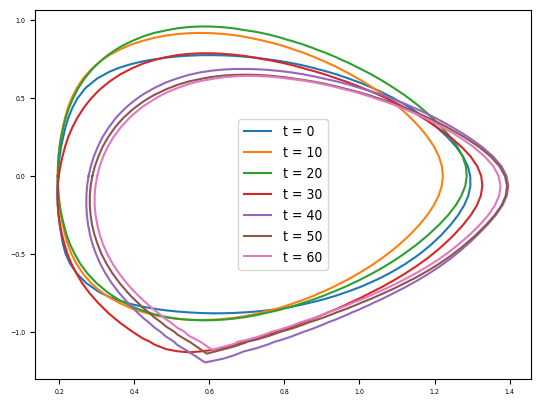

In [17]:
ds_z = xr.open_dataset('~/data/tiny/30390.zarr', group='efm/lcfsz_c', engine='zarr')
ds_r = xr.open_dataset('~/data/tiny/30390.zarr', group='efm/lcfsr_c', engine='zarr')

z = ds_z['data'].values
r = ds_r['data'].values

fill_value = np.max(z)
print(fill_value)

coords = {'r': [], 'z':[]}
for t in range(len(z)):
    coords['r'].append(r[t, r[t] < fill_value])
    coords['z'].append(z[t, z[t] < fill_value])

for t in range(0, len(z), 10):
    plt.plot(coords['r'][t], coords['z'][t], label=f't = {t}')

plt.legend()

### Magnetic Field Measurements: Center column vertical Bv array (CCBV), Outboard discrete B-field coils (OBV/OBR), Flux loops (FL)

In [18]:
import zarr

f = zarr.open_consolidated('/home/sljack/data/tiny/30420.zarr')
f = f['amb']
ds = {key: xr.open_dataset('~/data/tiny/30390.zarr', group=f'amb/{key}', engine='zarr') for key in f.keys() if 'ccbv' in key}

ds = xr.concat(ds, dim='n')
ds
# for k, v in ds.items():
#     plt.plot(v.time, v.data)

TypeError: can only concatenate xarray Dataset and DataArray objects, got <class 'str'>

## What is in XRT?

In [ ]:
import datatree
ds = datatree.open_datatree('/home/sljack/data/tiny/30420.zarr/xrt', engine='zarr')
ds

DataTree('None', parent=None)
├── DataTree('cii_hu10_u')
│       Dimensions:  (sec: 7000)
│       Coordinates:
│         * sec      (sec) float32 28kB -0.09999 -0.09989 -0.09979 ... 0.5998 0.5999
│       Data variables:
│           data     (sec) float32 28kB ...
│           error    (sec) float32 28kB ...
│       Attributes: (12/17)
│           dataset_item_uuid:  9721478c-d1fc-5577-9524-b926060b79c3
│           description:        
│           file_name:          None
│           format:             None
│           label:              Volt
│           mds_name:           \TOP.RAW.XRT:CII_HU10_U
│           ...                 ...
│           shot_id:            30420
│           source:             XRT
│           status:             1
│           time_index:         0
│           type:               Raw
│           units:              V
├── DataTree('co2')
│       Dimensions:  (sec: 7000)
│       Coordinates:
│         * sec      (sec) float32 28kB -0.1 -0.0999 -0.0998 ... 0.5997 0.5998 0.5999
│       Data variables:
│           data     (sec) float32 28kB ...
│           error    (sec) float32 28kB ...
│       Attributes: (12/17)
│           dataset_item_uuid:  9c2c51b1-9b9c-551e-8215-6dfe5dddff85
│           description:        
│           file_name:          None
│           format:             None
│           label:              Volt
│           mds_name:           \TOP.RAW.XRT:CO2
│           ...                 ...
│           shot_id:            30420
│           source:             XRT
│           status:             1
│           time_index:         0
│           type:               Raw
│           units:              V
├── DataTree('da_bo10')
│       Dimensions:  (sec: 7000)
│       Coordinates:
│         * sec      (sec) float32 28kB -0.09999 -0.09989 -0.09979 ... 0.5998 0.5999
│       Data variables:
│           data     (sec) float32 28kB ...
│           error    (sec) float32 28kB ...
│       Attributes: (12/17)
│           dataset_item_uuid:  f4affb61-e0ab-54af-9f00-4692a8c2f2b2
│           description:        
│           file_name:          None
│           format:             None
│           label:              Volt
│           mds_name:           \TOP.RAW.XRT:DA_BO10
│           ...                 ...
│           shot_id:            30420
│           source:             XRT
│           status:             1
│           time_index:         0
│           type:               Raw
│           units:              V
├── DataTree('hcamu#2')
│       Dimensions:  (sec: 7000)
│       Coordinates:
│         * sec      (sec) float32 28kB -0.09998 -0.09988 -0.09978 ... 0.5998 0.5999
│       Data variables:
│           data     (sec) float32 28kB ...
│           error    (sec) float32 28kB ...
│       Attributes: (12/17)
│           dataset_item_uuid:  42785c73-7eb7-53e0-846e-0f3ada8fa6a1
│           description:        
│           file_name:          None
│           format:             None
│           label:              Volt
│           mds_name:           \TOP.RAW.XRT:HCAMU_2
│           ...                 ...
│           shot_id:            30420
│           source:             XRT
│           status:             1
│           time_index:         0
│           type:               Raw
│           units:              V
├── DataTree('hene')
│       Dimensions:  (sec: 7000)
│       Coordinates:
│         * sec      (sec) float32 28kB -0.1 -0.0999 -0.09979 ... 0.5997 0.5998 0.5999
│       Data variables:
│           data     (sec) float32 28kB ...
│           error    (sec) float32 28kB ...
│       Attributes: (12/17)
│           dataset_item_uuid:  81776493-eda3-5a4a-9107-cadd5451e693
│           description:        
│           file_name:          None
│           format:             None
│           label:              Volt
│           mds_name:           \TOP.RAW.XRT:HENE
│           ...                 ...
│           shot_id:            30420
│           source:             XRT
│           status:         

S3 File Cache

In [ ]:
import s3fs
endpoint_url = f"https://s3.echo.stfc.ac.uk"
fs = s3fs.S3FileSystem(anon=True, endpoint_url=endpoint_url)
url = 's3://mast/test/shots/tiny/30390.zarr'
ds = xr.open_dataset(fs.get_mapper(url), engine='zarr', group=f'rba')

In [ ]:
import s3fs
import fsspec
endpoint_url = f"https://s3.echo.stfc.ac.uk"
# fs = fsspec.filesystem("filecache", target_protocol='s3', target_options={'anon': True},
#                        cache_storage='/tmp/files/')
url = 's3://mast/test/shots/tiny/30390.zarr'
of = fsspec.open("filecache::" + url,
                 )
ds = xr.open_dataset("filecache::" + url, engine='zarr', group=f'rba', storage_options={'s3': {'anon': True, 'endpoint_url': endpoint_url}, 'filecache': {'cache_storage':'/tmp/files'}})

ValueError: Starting with Zarr 2.11.0, stores must be subclasses of BaseStore, if your store exposes the MutableMapping interface wrap it in Zarr.storage.KVStore. Got <OpenFile 'mast/test/shots/tiny/30390.zarr'>

### ASX Calibration

In [12]:
import h5py
import pandas as pd

with h5py.File('asx_calibration_46353.h5') as handle:
    names = handle['calibration_data']['block1_items'][:]
    values = handle['calibration_data']['block1_values'][:]


names = [name.decode('utf-8') for name in names]
df = pd.DataFrame(values, columns=names)
df = df.rename({
    'R_origin': 'r1',
    'R_endpoint': 'r2',
    'z_origin': 'z1',
    'z_endpoint': 'z2'
}, axis=1)
df = df.drop('calibration_factor', axis=1)
df['comment'] = ''
df['name'] = ''
df.to_csv('mast-u_asx_calibration.csv', index=None)
df

,r1,z1,r2,z2,comment,name
0,2.076,0.0,0.196,0.0290,,
1,2.076,0.0,0.196,-0.0395,,
2,2.076,0.0,0.196,-0.1157,,
3,2.076,0.0,0.196,-0.1860,,
4,2.076,0.0,0.196,-0.2580,,
5,2.076,0.0,0.196,-0.3310,,
6,2.076,0.0,0.196,-0.4072,,
7,2.076,0.0,0.196,-0.4847,,
8,2.076,0.0,0.196,-0.5640,,
9,2.076,0.0,0.196,-0.6572,,
